In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from slime.city import City
import pandas as pd

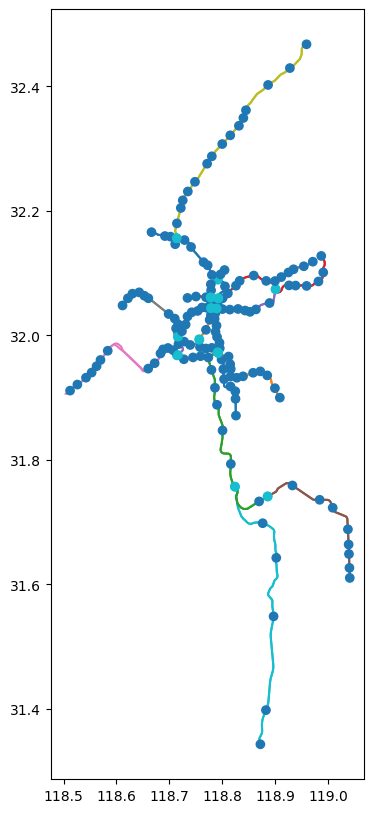

In [2]:
stations = gpd.read_file('database/nanjing_nodes.geojson')
routes = gpd.read_file('database/nanjing_edges.geojson')
# drop irrelevant columns and null value
stations = stations.drop(['name', 'marker-symbol', 'marker-size'], axis=1)
routes = routes.drop(['name', 'ref'], axis=1)
stations = stations[~stations['marker-color'].isnull()].reset_index().drop(['index'], axis=1)
# gpd.options.display_precision = 4
fig, ax = plt.subplots(figsize=(10, 10))
stations.plot(ax=ax, column=stations['marker-color'], zorder=2)
routes.plot(ax=ax, column='stroke', zorder=1)
plt.show()

In [3]:
# preprocess node attribute
stations['lon'], stations['lat'] = stations.geometry.x, stations.geometry.y
stations['value'] = np.where(stations['marker-color']=='#ff2600', 10, 5)
min_x = min(stations['lon'])
min_y = min(stations['lat'])
stations['x'] = stations.lon.apply(lambda x: int((x - min_x) * (10**3))+ 30)
stations['y'] = stations.lat.apply(lambda y: int((y - min_y) * (10**3))+ 30)
stations['type'] = 'False'
stations.loc[stations['x'] == max(stations['x']), 'type'] = 'right'
stations.loc[stations['x'] == min(stations['x']), 'type'] = 'left'
stations.loc[stations['y'] == max(stations['y']), 'type'] = 'up'
stations.loc[stations['y'] == min(stations['y']), 'type'] = 'down'
stations = pd.DataFrame(stations.drop(['geometry'], axis=1))


In [4]:
routes.head()

,stroke,geometry
0,#f1bc1a,"LINESTRING (118.82147 31.75946, 118.82281 31.7..."
1,#f1bc1a,"LINESTRING (118.87229 31.34309, 118.87190 31.3..."
2,#ca8687,"LINESTRING (119.04148 31.61031, 119.04083 31.6..."
3,#ca8687,"LINESTRING (118.88598 31.74120, 118.90000 31.7..."
4,#da60cd,"LINESTRING (118.50250 31.90719, 118.50285 31.9..."


In [5]:
stations.head()

,marker-color,lon,lat,value,x,y,type
0,#797979,118.863858,32.041670,5,381,728,False
1,#797979,118.779027,32.052965,5,296,739,False
2,#797979,118.982163,32.086573,5,500,773,False
3,#797979,118.542290,31.931998,5,60,618,False
4,#ff2600,118.789430,32.044122,10,307,731,False


In [6]:
# fig = plt.figure(figsize=(20, 10))
# sns.scatterplot(stations, x='x', y='y', hue='value')

In [7]:
city = City(city_shape=(max(stations.x) + 50, max(stations.y) + 50), foods=stations, mould_shape=(5, 5), init_mould_coverage=0.5, decay=0.01)

In [8]:
# city.draw_foods()

6
17
37
53
75
102
121
142
163
182
199
216
233
250
268
280
329
381
433
481
518
555
589
622
654
683
710
735
758
776
810
847
876
910
938
962
988
1009
1029
1047
1066
1074
1132
1187
1238
1285
1326
1364
1398
1449
1501
1546
1601
1665
1726
1777
1827
1872
1913
1950
1984
2026
2061
2088
2121
2144
2212
2268
2307
2336
2416
2489
2546
2600
2649
2694
2740
2778
2821
2860
2944
3021
3088
3145
3190
3225
3254
3279
3374
3456
3529
3593
3643
3697
3745
3815
3887
3948
4009
4063
4111
4162


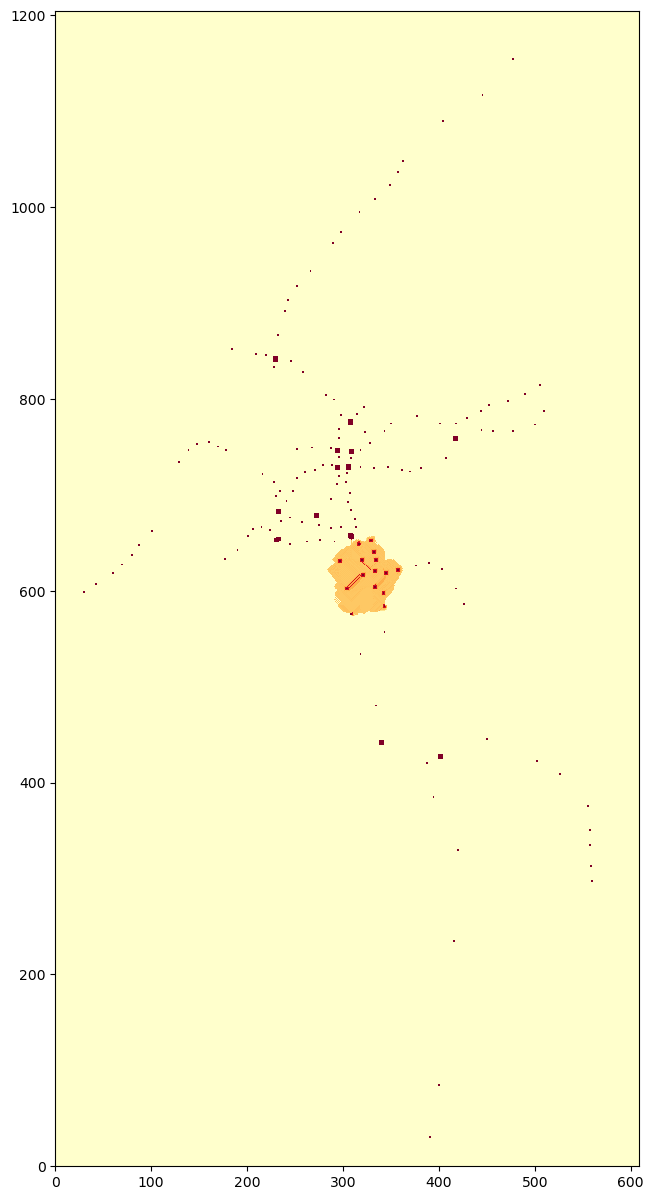

In [9]:
city.animate(frames=100, interval=100, filename="output/test1.gif")
plt.show()